In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("kc_house_data.csv") # csv파일을 불러와 DataFrame 객체로 저장
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### 개선 방안
1. y값인 price를 우측으로 이동
2. date column의 데이터 타입을 날짜 형식으로 변환 -> linearregression은 날짜 형식 데이터 사용 불가

### 한계
1. 특성 파악 미흡(condition, grade, sqft_above, sqft_basement, sqft_living15, sqft_lot15)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
df['date'] = pd.to_datetime(df['date']) # object 타입인 date를 float로 변경하기 위해 날짜 형식으로 변경 후
df['date_delta'] = (df['date'] - df['date'].min())  / np.timedelta64(1,'D') # 연산을 통해 float 형식으로 변경. 가장 이른 날부터 상대적인 날짜 수를 나타냄
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date_delta'],
      dtype='object')

In [5]:
df = df[['id', 'date_delta', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']] # 필요 없어진 date column 정리, price column을 맨 뒤로 보냄
df.rename(columns = {"date_delta" : "date"}, inplace = True) # column 명 정리
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,164.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,221.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,299.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,221.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,292.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [7]:
X = df.loc[:, 'date':'sqft_lot15']
X

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,164.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,221.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,299.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,221.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,292.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,19.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,297.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,52.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,259.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [8]:
y = df['price']
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [9]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

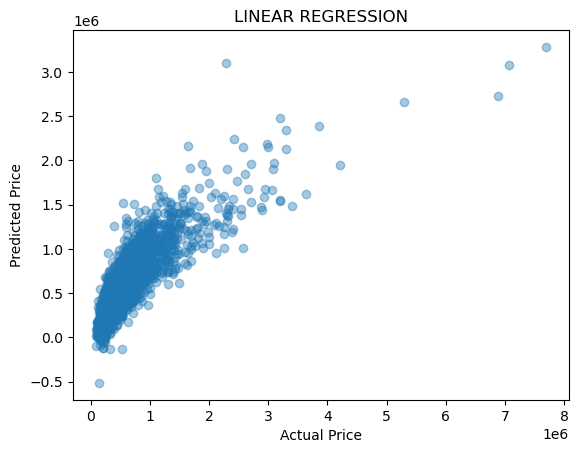

In [11]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("LINEAR REGRESSION")
plt.show()

In [12]:
reg.coef_ # lat의 가중치가 가장 높음(미치는 영향이 가장 큼) --> 결과가 이상하다고 판단

array([ 1.13298099e+02, -3.21189856e+04,  3.63219645e+04,  1.06202988e+02,
        1.29774538e-01,  1.05799393e+04,  5.39083904e+05,  5.16848793e+04,
        2.89751789e+04,  9.61157729e+04,  6.83460930e+01,  3.78568954e+01,
       -2.51586528e+03,  2.20724752e+01, -5.48048312e+02,  6.13097703e+05,
       -2.04850725e+05,  2.15201156e+01, -3.47711527e-01])

In [13]:
reg.score(X_train, y_train)

0.7050182624005739

In [14]:
reg.score(X_test, y_test)

0.687090508567493

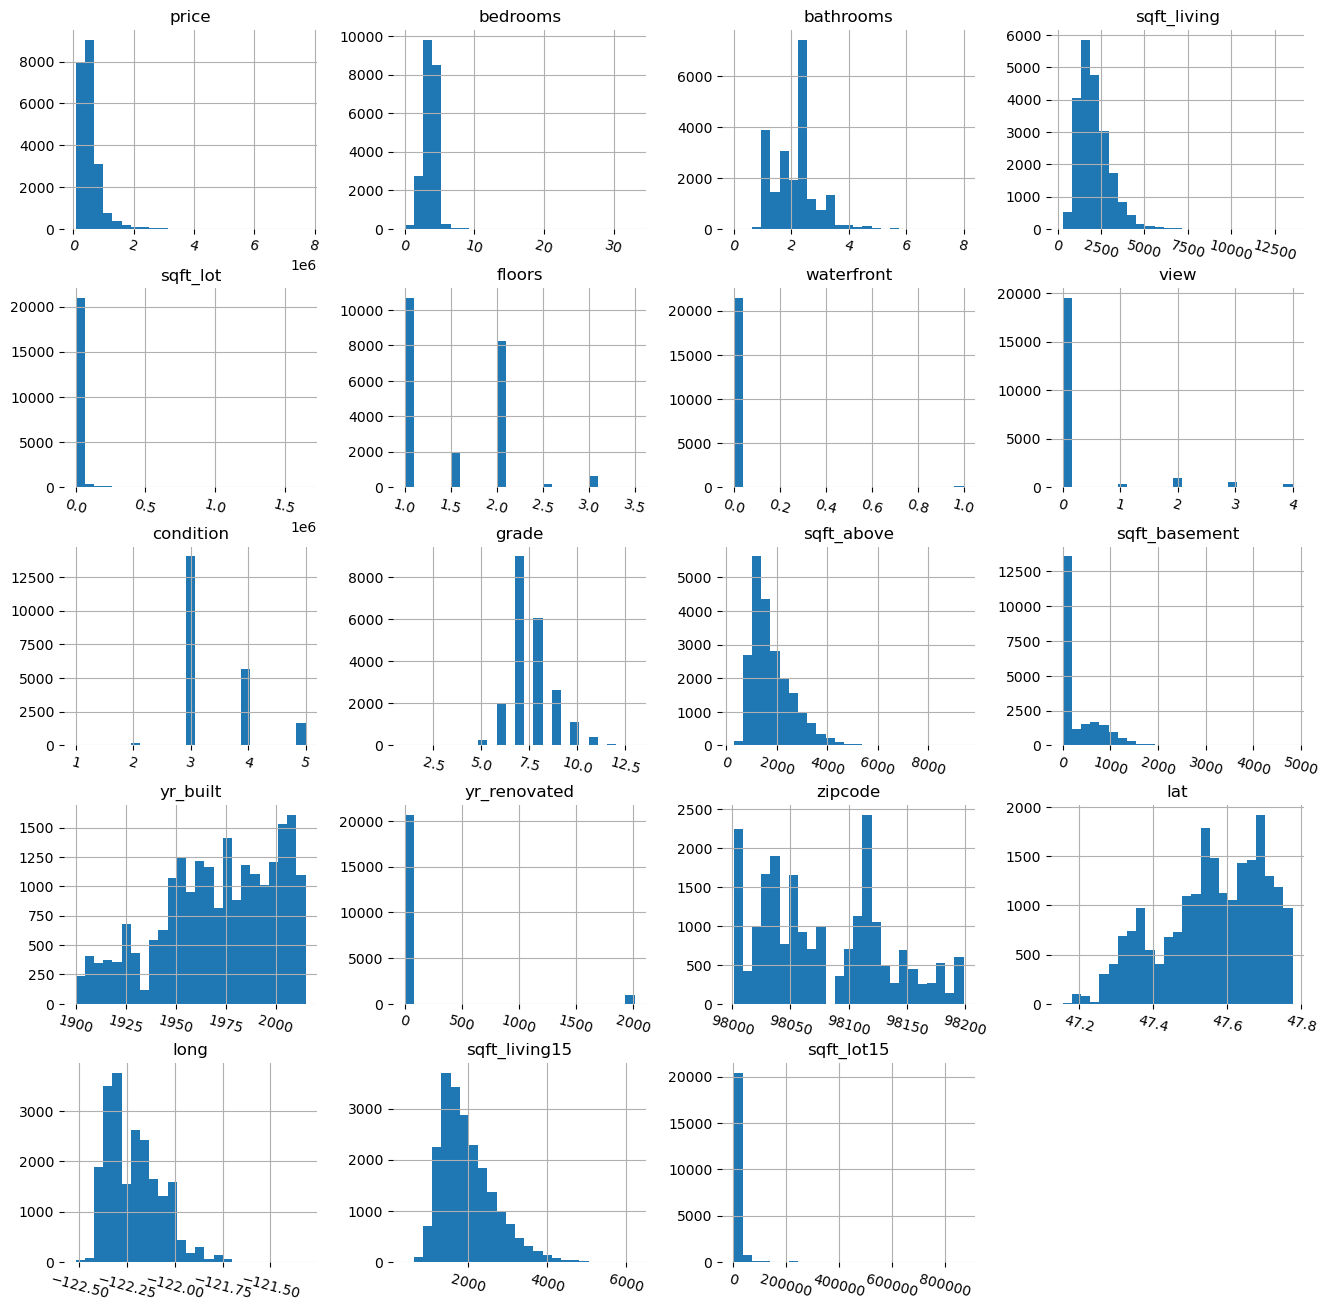

In [15]:
import seaborn as sns

df1=df[['price', 'bedrooms', 'bathrooms', 'sqft_living',# 각 특성 시각화
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
    'lat', 'long', 'sqft_living15', 'sqft_lot15']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

C:\Users\hj\AppData\Local\Temp\ipykernel_8788\1058345019.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df[features].corr(), dtype=np.bool)


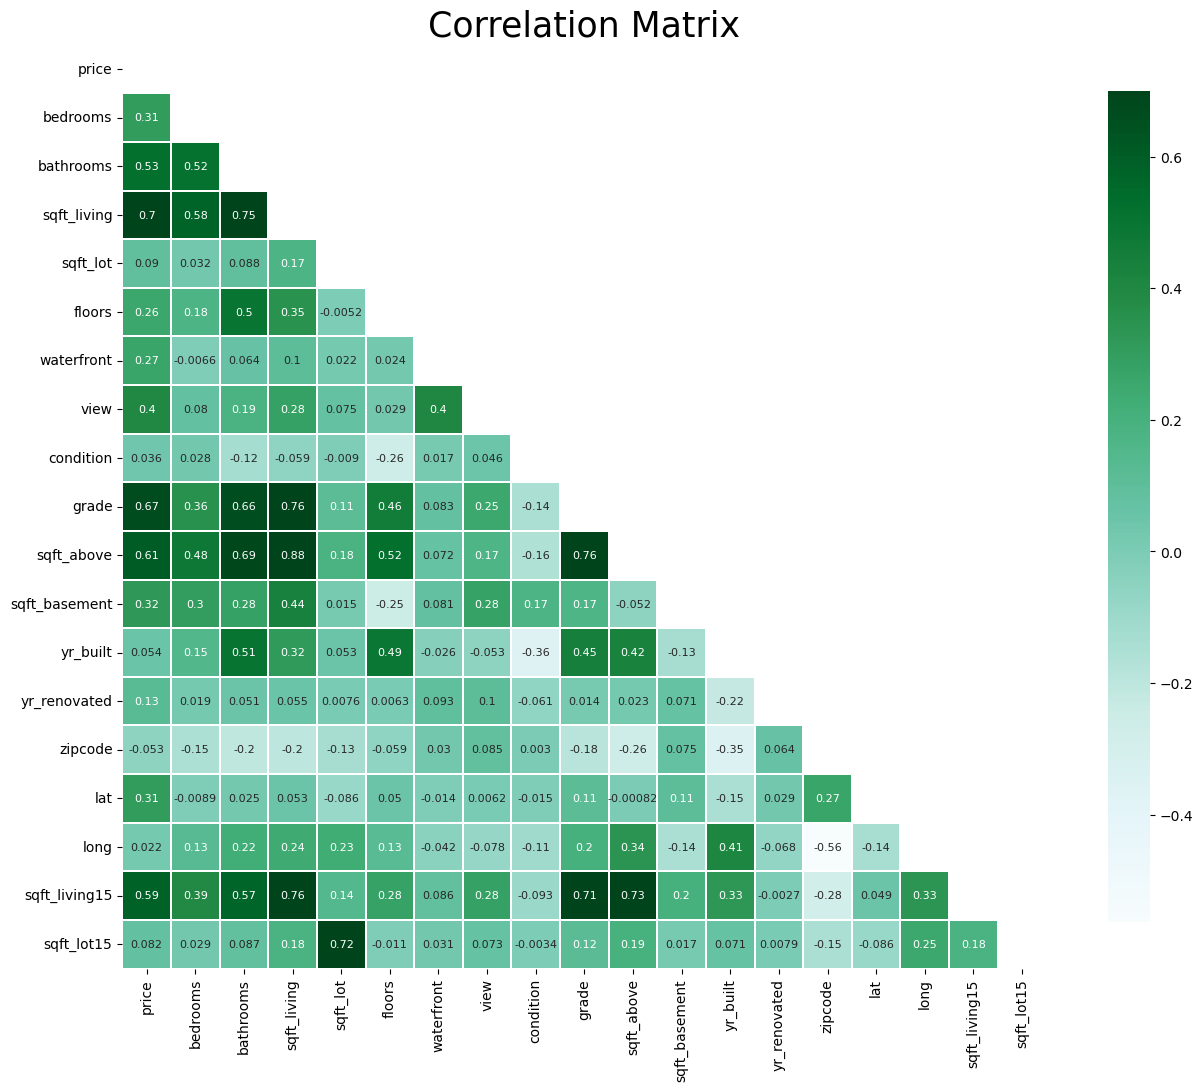

In [16]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [17]:
#표준화, 이상치 제거, 정규화 후 예측
#코드 출처 : https://huidea.tistory.com/39

from sklearn.preprocessing import StandardScaler


print('feature 들의 평균 값')
print(df.mean())
print('\nfeature 들의 분산 값')
print(df.var())

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(df)
df_scaled = scaler.transform(df)

print("\n=========== 표준화 ==============\n")

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
df_scaled = pd.DataFrame(data=df_scaled, columns=df.columns)
print('feature 들의 평균 값')
print(df_scaled.mean())
print('\nfeature 들의 분산 값')
print(df_scaled.var())

feature 들의 평균 값
id               4.580302e+09
date             1.801931e+02
bedrooms         3.370842e+00
bathrooms        2.114757e+00
sqft_living      2.079900e+03
sqft_lot         1.510697e+04
floors           1.494309e+00
waterfront       7.541757e-03
view             2.343034e-01
condition        3.409430e+00
grade            7.656873e+00
sqft_above       1.788391e+03
sqft_basement    2.915090e+02
yr_built         1.971005e+03
yr_renovated     8.440226e+01
zipcode          9.807794e+04
lat              4.756005e+01
long            -1.222139e+02
sqft_living15    1.986552e+03
sqft_lot15       1.276846e+04
price            5.400881e+05
dtype: float64

feature 들의 분산 값
id               8.274629e+18
date             1.277985e+04
bedrooms         8.650150e-01
bathrooms        5.931513e-01
sqft_living      8.435337e+05
sqft_lot         1.715659e+09
floors           2.915880e-01
waterfront       7.485226e-03
view             5.872426e-01
condition        4.234665e-01
grade            1.381

In [18]:
import scipy as sp

# check Z score 
df_Zscore = pd.DataFrame()
outlier_dict = {}
outlier_idx_list = []

for one_col in df_scaled.columns:
    print("Check",one_col)
    df_Zscore[f'{one_col}_Zscore'] = sp.stats.zscore(df_scaled[one_col])
    outlier_dict[one_col] = df_Zscore[f'{one_col}_Zscore'][(df_Zscore[f'{one_col}_Zscore']>2)|(df_Zscore[f'{one_col}_Zscore']<-2)]
    outlier_idx_list.append(list(outlier_dict[one_col].index))
    if len(outlier_dict[one_col]):
        print(one_col,'Has outliers\n', outlier_dict[one_col])
    else:
        print(one_col,"Has Not outlier")
    print()


print("Before", df_scaled.shape)
all_outlier_idx = sum(outlier_idx_list,[])
df_scaled = df_scaled.drop(all_outlier_idx)
print("After (drop outlier)", df_scaled.shape)

Check id
id Has Not outlier

Check date
date Has Not outlier

Check bedrooms
bedrooms Has outliers
 154     -2.549182
209      2.826929
232      2.826929
239      2.826929
264     -2.549182
           ...   
21375    2.826929
21443   -2.549182
21519   -2.549182
21522    2.826929
21552   -2.549182
Name: bedrooms_Zscore, Length: 546, dtype: float64

Check bathrooms
bathrooms Has outliers
 5        3.097133
75       2.447905
235      2.447905
270      3.421747
300      3.746361
           ...   
21551    3.097133
21561    2.447905
21576    3.097133
21593    2.123291
21600    2.123291
Name: bathrooms_Zscore, Length: 571, dtype: float64

Check sqft_living
sqft_living Has outliers
 5        3.636791
41       2.330199
70       2.929053
115      2.504411
132      2.036215
           ...   
21576    3.016160
21590    3.081489
21593    2.275757
21599    2.079769
21600    2.602405
Name: sqft_living_Zscore, Length: 881, dtype: float64

Check sqft_lot
sqft_lot Has outliers
 5        2.096185
102   

In [19]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)


# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
df_scaled = pd.DataFrame(data=df_scaled, columns=df.columns)
print('feature들의 최소 값(후)')
print(df_scaled.min())
print('\nfeature들의 최대 값(후)')
print(df_scaled.max())

feature들의 최소 값(후)
id               0.0
date             0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
price            0.0
dtype: float64

feature들의 최대 값(후)
id               1.0
date             1.0
bedrooms         1.0
bathrooms        1.0
sqft_living      1.0
sqft_lot         1.0
floors           1.0
waterfront       0.0
view             1.0
condition        1.0
grade            1.0
sqft_above       1.0
sqft_basement    1.0
yr_built         1.0
yr_renovated     0.0
zipcode          1.0
lat              1.0
long             1.0
sqft_living15    1.0
sqft_lot15       1.0
price            1.0
dtype: float64


In [20]:
X = df_scaled.loc[:, 'date':'sqft_lot15']
X

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.423773,0.333333,0.090909,0.186186,0.052303,0.000000,0.0,0.0,0.0,0.25,0.236486,0.000000,0.411765,0.0,1.000000,0.461274,0.423636,0.263736,0.075747
1,0.772610,0.000000,0.090909,0.063063,0.097107,0.000000,0.0,0.0,0.0,0.00,0.097973,0.000000,0.196078,0.0,0.152542,0.919717,0.467273,0.769231,0.112295
2,0.754522,0.333333,0.454545,0.336336,0.077331,0.000000,0.0,0.0,0.0,0.50,0.405405,0.000000,0.725490,0.0,0.412429,0.674823,0.809091,0.432234,0.103824
3,0.144703,0.333333,0.545455,0.346847,0.064343,0.666667,0.0,0.0,0.0,0.25,0.417230,0.000000,0.803922,0.0,0.011299,0.053792,0.296364,0.592674,0.093460
4,0.899225,0.333333,0.090909,0.366366,0.071048,0.000000,0.0,0.0,0.0,0.25,0.192568,0.623932,0.460784,0.0,0.819209,0.463498,0.278182,0.424908,0.113067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12672,0.757106,0.333333,0.636364,0.225225,0.007436,0.666667,0.0,0.0,0.0,0.50,0.236486,0.111111,0.931373,0.0,0.649718,0.594944,0.147273,0.260073,0.009304
12673,0.767442,0.666667,0.636364,0.525526,0.053981,0.666667,0.0,0.0,0.0,0.50,0.618243,0.000000,0.990196,0.0,0.819209,0.460263,0.232727,0.443223,0.099233
12674,0.134367,0.000000,0.000000,0.138138,0.008013,0.666667,0.0,0.0,0.0,0.25,0.182432,0.000000,0.941176,0.0,0.807910,0.629525,0.347273,0.146520,0.020547
12675,0.669251,0.333333,0.636364,0.312312,0.018704,0.666667,0.0,0.0,0.0,0.50,0.378378,0.000000,0.892157,0.0,0.146893,0.508392,0.765455,0.289377,0.009637


In [21]:
y = df_scaled['price']
y

0        0.117514
1        0.082318
2        0.359513
3        0.147417
4        0.123898
           ...   
12672    0.330113
12673    0.267115
12674    0.268879
12675    0.267115
12676    0.204116
Name: price, Length: 12677, dtype: float64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [23]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

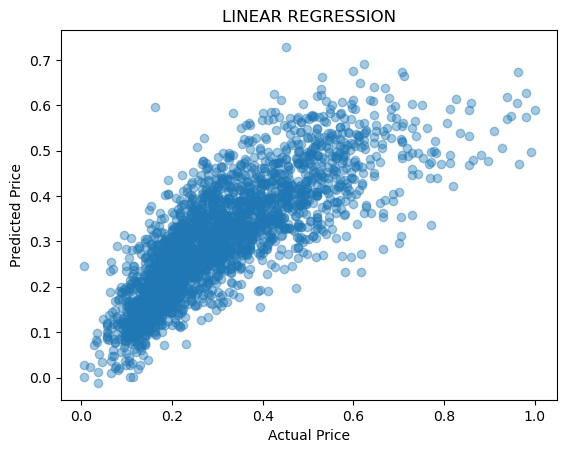

In [24]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("LINEAR REGRESSION")
plt.show()

In [25]:
reg.coef_

array([ 2.11026210e-02, -3.98079670e-02,  5.56172138e-02,  1.18362212e-01,
        2.55613437e-02,  4.01320780e-02,  5.55111512e-17,  8.30546076e-02,
        2.24668061e-02,  2.59318900e-01,  1.13649163e-01,  4.93543961e-02,
       -1.61794166e-01,  3.46944695e-17, -3.99569189e-02,  2.32085069e-01,
       -1.70741311e-03,  7.47740438e-02, -8.29061380e-02])

In [26]:
reg.score(X_train, y_train)

0.6467861537375249

In [27]:
reg.score(X_test, y_test)

0.634373353960777

### 점수가 더 낮아진 이유 분석

- 위 과정이 필요 없는 feature를 같이 해서 성능이 더 하락했다? > 아니었음
- 위 과정이 모든 feature에 필요 없었다? > 어떤 preprocessing이 필요한지 파악하기 위해
https://www.kaggle.com/code/burhanykiyakoglu/predicting-house-prices 의 코드를 참고하여 binning을 거친 polynomial ridge regression (alpha=50000, degree=2, all features)가 가장 적합하다는 것을 알게 됨.

- binning이란 연속형 변수를 특정 구간으로 나누어 범주형 or 순위형 변수로 변환하는 방법을 말함

- binning의 장점
1. 이상치를 제거하지 않고도 이상치로 발생할 수 있는 문제를 완화할 수 있음
2. 결측치에 임의의 값을 채우지 않고 그대로 사용할 수 있음

In [28]:
df = pd.read_csv("kc_house_data.csv")
df_dm=df.copy()
df_dm.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


C:\Users\hj\AppData\Local\Temp\ipykernel_8788\1611505319.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dm['age_rnv'][df_dm['age_rnv'].isnull()]=0
C:\Users\hj\Anaconda3\envs\mlclass\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hj\Anaconda3\envs\mlclass\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

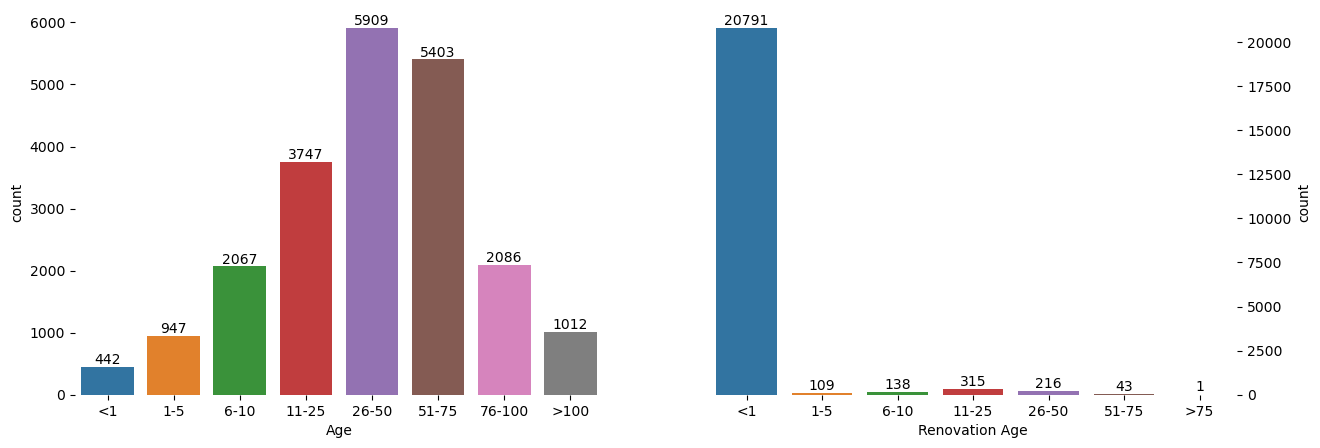

In [29]:
# just take the year from the date column
df_dm['sales_yr']=df_dm['date'].astype(str).str[:4]

# add the age of the buildings when the houses were sold as a new column
df_dm['age']=df_dm['sales_yr'].astype(int)-df_dm['yr_built']
# add the age of the renovation when the houses were sold as a new column
df_dm['age_rnv']=0
df_dm['age_rnv']=df_dm['sales_yr'][df_dm['yr_renovated']!=0].astype(int)-df_dm['yr_renovated'][df_dm['yr_renovated']!=0]
df_dm['age_rnv'][df_dm['age_rnv'].isnull()]=0

# partition the age into bins
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
df_dm['age_binned'] = pd.cut(df_dm['age'], bins=bins, labels=labels)
# partition the age_rnv into bins
bins = [-2,0,5,10,25,50,75,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','>75']
df_dm['age_rnv_binned'] = pd.cut(df_dm['age_rnv'], bins=bins, labels=labels)

# histograms for the binned columns
f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(df_dm['age_binned'],ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50,height,ha="center")   
p2=sns.countplot(df_dm['age_rnv_binned'],ax=axes[1])
sns.despine(left=True, bottom=True)
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 200,height,ha="center")
    
axes[0].set(xlabel='Age')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Renovation Age');

# transform the factor values to be able to use in the model
df_dm = pd.get_dummies(df_dm, columns=['age_binned','age_rnv_binned'])

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score

train_data_dm,test_data_dm = train_test_split(df_dm,train_size = 0.8,random_state=3)

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df_dm[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Ridge(alpha=50000).fit(X_trainpoly, train_data_dm['price'])

pred0 = poly.predict(X_testpoly)
rmsepoly0 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred7)),'.3f'))
rtrpoly0 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly0 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv0 = float(format(cross_val_score(linear_model.Ridge(alpha=50000),X_allpoly,df_dm['price'],cv=5).mean(),'.3f'))

C:\Users\hj\Anaconda3\envs\mlclass\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.02216e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\hj\Anaconda3\envs\mlclass\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=9.24669e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [43]:
print(rtrpoly0, rtepoly0, cv0)

0.81 0.801 0.791


## 배운 점
- LinearRegression().score()는 R-squared (결정계수) 점수를 나타내며 이는 1 - 잔차^2 / 편차^2 라는 것 복습
- feature가 많은 것이 무조건 좋은 것은 아니다. correlation matrix로 확인 가능한 feature 간 연관성이 높은 feature를 둘 다 유지하면 overfitting 가능성이 높아짐. 그러나 모든 연관성 높은 feature에 해당하는 것은 아니므로 추가 판단이 필요함.
- 상술했던 data binning이란 preprocessing 방법을 알게 됨
- 특성들을 그래프로 시각화하여 어떤 preprocessing이 필요한지 확인하는 과정을 거치면 좋음. 모든 데이터가 표준화, 정규화가 필요하진 않음
- polinomial regression과 multiple regression의 차이를 알게 됨. 전자는 차수가 높은 곡선 형태이고 후자는 1차(직선)형태